<a href="https://colab.research.google.com/github/parshadk/DataMiningAndBusinessIntelligence/blob/main/dmbi_exp_2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMBI exp 2

# Loading data with pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/fraud_dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


# Data Cleaning and preprocessing

Check for Missing Values:

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


Drop missing values

In [ ]:
df_cleaned = df.dropna()
print(df_cleaned.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
df.fillna(0, inplace=True)  # Replace missing values with 0


#  EDA - Descriptive Statistics


In [ ]:
summary_statistics = df.describe()
print(summary_statistics)

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  559183.000000  5.591830e+05   5.591830e+05    5.591830e+05   
mean       14.610641  1.617504e+05   9.021192e+05    9.218979e+05   
std         4.085338  2.668256e+05   3.001462e+06    3.038590e+06   
min         1.000000  1.000000e-01   0.000000e+00    0.000000e+00   
25%        11.000000  1.266686e+04   0.000000e+00    0.000000e+00   
50%        15.000000  7.748453e+04   1.811200e+04    0.000000e+00   
75%        18.000000  2.163032e+05   1.611389e+05    2.000333e+05   
max        22.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    5.591830e+05    5.591830e+05  559183.000000        559183.0  
mean     9.771841e+05    1.145855e+06       0.000458             0.0  
std      2.322885e+06    2.486717e+06       0.021392             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00  

### mean ,median


In [ ]:
mean_values = df.mean(numeric_only=True)

print("Mean Values:\n", mean_values)

Mean Values:
 step              1.461064e+01
amount            1.617504e+05
oldbalanceOrg     9.021192e+05
newbalanceOrig    9.218979e+05
oldbalanceDest    9.771841e+05
newbalanceDest    1.145855e+06
isFraud           4.578108e-04
isFlaggedFraud    0.000000e+00
dtype: float64


In [ ]:

median_values = df.median(numeric_only=True)
print("Median Values:\n", median_values)

Median Values:
 step                  15.00
amount             77484.53
oldbalanceOrg      18112.00
newbalanceOrig         0.00
oldbalanceDest    117386.19
newbalanceDest    212518.34
isFraud                0.00
isFlaggedFraud         0.00
dtype: float64


In [ ]:

std_values = df.std(numeric_only=True)

print("Standard Deviation Values:\n", std_values)

Standard Deviation Values:
 step              4.085338e+00
amount            2.668256e+05
oldbalanceOrg     3.001462e+06
newbalanceOrig    3.038590e+06
oldbalanceDest    2.322885e+06
newbalanceDest    2.486717e+06
isFraud           2.139163e-02
isFlaggedFraud    0.000000e+00
dtype: float64


### Identify Categorical Columns:

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 Index(['type', 'nameOrig', 'nameDest'], dtype='object')


### Create Frequency Tables

In [ ]:
frequency_tables = {col: df[col].value_counts() for col in categorical_columns}

for col, freq_table in frequency_tables.items():
    print(f"Frequency Table for {col}:\n{freq_table}\n")


Frequency Table for type:
type
CASH_OUT    201223
PAYMENT     186571
CASH_IN     121782
TRANSFER     45409
DEBIT         4198
Name: count, dtype: int64

Frequency Table for nameOrig:
nameOrig
C850048660     2
C745009740     2
C1840223033    2
C1162717140    2
C282214944     2
              ..
C1096628351    1
C1320425804    1
C1730317018    1
C1191670460    1
0              1
Name: count, Length: 559118, dtype: int64

Frequency Table for nameDest:
nameDest
C985934102     93
C248609774     87
C1286084959    87
C2083562754    84
C665576141     84
               ..
M305760580      1
M2036029984     1
M862856566      1
M868229580      1
0               1
Name: count, Length: 240930, dtype: int64



# Data Visualization with Matplotlib and Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

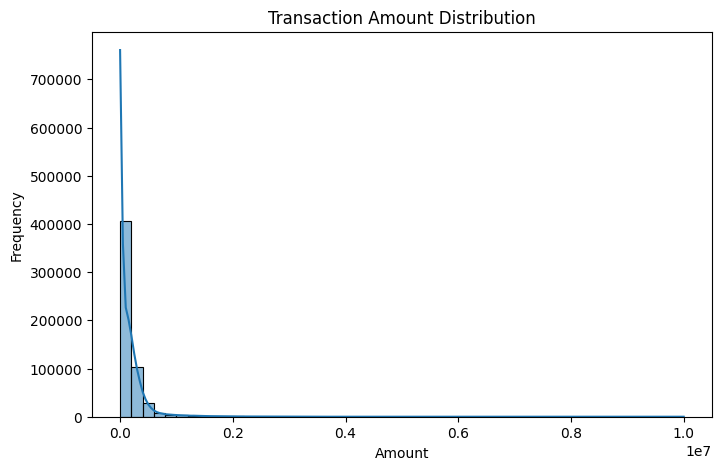

In [ ]:
# Example: Histogram for Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


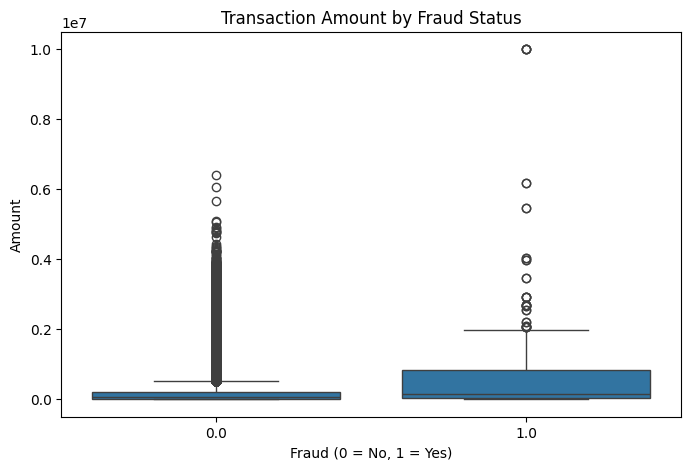

In [ ]:
# Example: Box Plot for Transaction Amount by Fraud Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['isFraud'], y=df['amount'])
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Amount')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


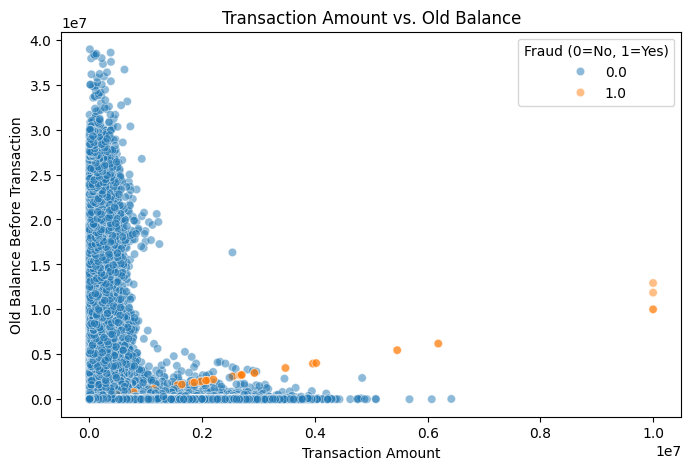

In [ ]:
# Example: Scatter Plot for Amount vs. Balance After Transaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['amount'], y=df['oldbalanceOrg'], hue=df['isFraud'], alpha=0.5)
plt.title('Transaction Amount vs. Old Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Old Balance Before Transaction')
plt.legend(title='Fraud (0=No, 1=Yes)')
plt.show()


# Correlation Analysis

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display correlation values
print(correlation_matrix)


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.055816       0.001403        0.001851   
amount         -0.055816  1.000000      -0.005248       -0.006443   
oldbalanceOrg   0.001403 -0.005248       1.000000        0.999267   
newbalanceOrig  0.001851 -0.006443       0.999267        1.000000   
oldbalanceDest  0.008381  0.219026       0.093015        0.094608   
newbalanceDest -0.019593  0.320565       0.063394        0.063011   
isFraud        -0.016889  0.051274      -0.000732       -0.006341   
isFlaggedFraud       NaN       NaN            NaN             NaN   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.008381       -0.019593 -0.016889             NaN  
amount                0.219026        0.320565  0.051274             NaN  
oldbalanceOrg         0.093015        0.063394 -0.000732             NaN  
newbalanceOrig        0.094608        0.063011 -0.006341             NaN  
old

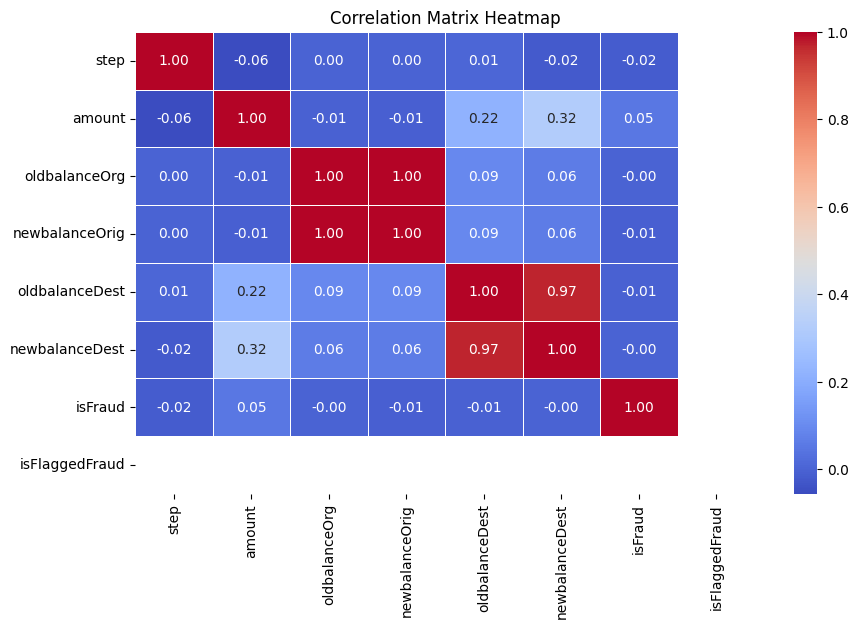

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap")

# Show plot
plt.show()


# Identifying Outliers

### Create Box Plots for Numerical Columns

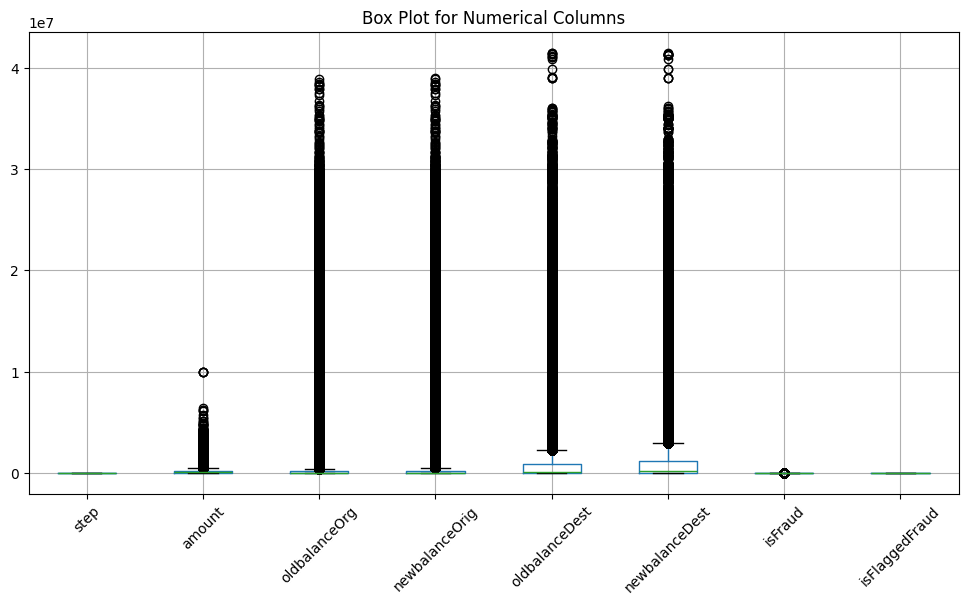

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)  # Rotate labels for readability
plt.title("Box Plot for Numerical Columns")
plt.show()


### Identify Outliers Using the IQR Method

In [ ]:
# Define a function to detect outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower fence
    upper_bound = Q3 + 1.5 * IQR  # Upper fence

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example: Detect outliers in "amount"
outliers_amount = detect_outliers_iqr(df, 'amount')
print(f"Number of outliers in 'amount': {len(outliers_amount)}")


Number of outliers in 'amount': 29137


### Handle Outliers by removing

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

# Example: Remove outliers in 'amount'
df_cleaned = remove_outliers_iqr(df, 'amount')
print(f"Data shape before removing outliers: {df.shape}")
print(f"Data shape after removing outliers: {df_cleaned.shape}")


Data shape before removing outliers: (559183, 11)
Data shape after removing outliers: (530046, 11)


### Handle Outliers by transforming

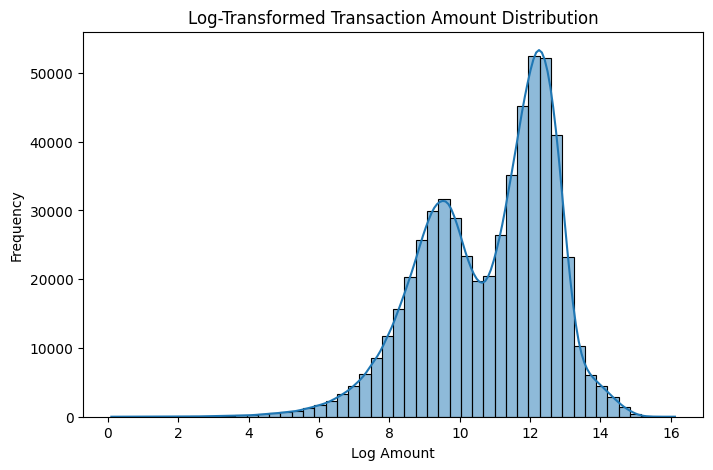

In [ ]:
import numpy as np
# Apply log transformation to "amount"
df['amount_log'] = np.log1p(df['amount'])  # log1p avoids log(0) errors

# Plot the transformed data
plt.figure(figsize=(8, 5))
sns.histplot(df['amount_log'], bins=50, kde=True)
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log Amount")
plt.ylabel("Frequency")
plt.show()


8. Feature Engineering

In [ ]:
# Creating new features like transaction frequency and total amount per user
user_transactions = df.groupby('nameOrig').agg({
    'amount': ['sum', 'mean', 'count'],
    'isFraud': 'sum'
})
user_transactions.columns = ['total_amount', 'average_amount', 'transaction_count', 'fraud_count']
user_transactions.reset_index(inplace=True)

# Merge the new features back into the main dataset
df = df.merge(user_transactions, on='nameOrig', how='left')
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0      0.0             0.0   
1  M2044282225             0.0             0.0      0.0             0.0   
2   C553264065             0.0             0.0      1.0             0.0   
3    C38997010         21182.0             0.0      1.0             0.0   
4  M1230701703             0.0             0.0      0.0             0.0   

   amount_log  total_amount_x  average_amount_x  transaction_count_x  \
0    9.194276         9839

9. Missing Data Handling

In [ ]:
# Handling Missing Data (if any exists, we fill with median values)
df.fillna(df.median(numeric_only=True), inplace=True)
print(df.isnull().sum())


step                   0
type                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
amount_log             0
total_amount_x         0
average_amount_x       0
transaction_count_x    0
fraud_count_x          0
total_amount_y         0
average_amount_y       0
transaction_count_y    0
fraud_count_y          0
dtype: int64


10. Hypothesis Testing

In [ ]:
from scipy import stats

# Test whether fraudulent transactions have significantly higher amounts
fraudulent = df[df['isFraud'] == 1]['amount']
legitimate = df[df['isFraud'] == 0]['amount']

t_stat, p_value = stats.ttest_ind(fraudulent, legitimate, equal_var=False)
print(f"T-Test Statistic: {t_stat}, P-Value: {p_value}")


T-Test Statistic: 6.383503000157304, P-Value: 8.12387758918285e-10


11. Data Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
numeric_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())


   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1 -0.569327  C1231006815      -0.243876       -0.250643  M1979787155   
1     1 -0.599216  C1666544295      -0.293481       -0.297017  M2044282225   
2     1 -0.605525  C1305486145      -0.300500       -0.303397   C553264065   
3     1 -0.605525   C840083671      -0.300500       -0.303397    C38997010   
4     1 -0.562474  C2048537720      -0.286716       -0.293561  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  ...  \
0       -0.420677       -0.460791      0.0             0.0  ...   
1       -0.420677       -0.460791      0.0             0.0  ...   
2       -0.420677       -0.460791      1.0             0.0  ...   
3       -0.411558       -0.460791      1.0             0.0  ...   
4       -0.420677       -0.460791      0.0             0.0  ...   

   transaction_count_y  fraud_count_y  type_CASH_OUT  type_DEBIT  \
0                    1            0.0            0.0        

12.Dimensionality Reduction

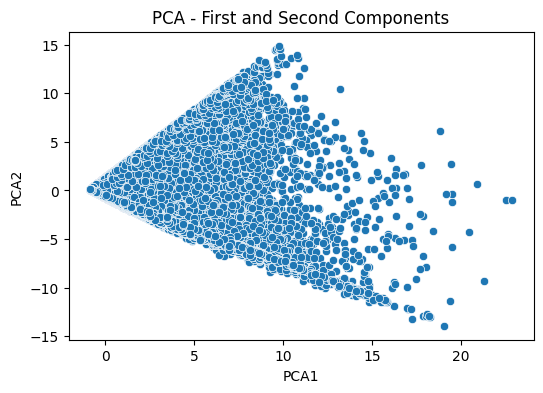

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#  Apply PCA to the scaled numeric columns
features = df[numeric_cols]
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

#  Add the PCA components to the DataFrame
df['PCA1'], df['PCA2'] = pca_components[:, 0], pca_components[:, 1]

#  Plot the PCA components
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', data=df)
plt.title('PCA - First and Second Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
